# Boston Marathon challenge

You now have a pretty varied suite of clustering and clustering evaluation methods; we'd be remiss if we didn't give you the opportunity to try them out on some real data. So here we go!

There is a lot of information on runners and their performance for the [Boston Marathon](https://github.com/llimllib/bostonmarathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df = df.drop(['ctz','state','name','country','city','bib','division','genderdiv','gender','overall'], 1)

In [5]:
df = df.dropna()

In [6]:
#df['gender'] = np.where(df['gender'] == 'M', 1, 0)

In [7]:
df.head(20)

,10k,25k,age,official,35k,pace,30k,5k,half,20k,40k
0,17.37,47.67,47,85.25,71.40,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,33,138.95,116.37,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,41,80.60,67.42,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,24,140.58,116.37,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,40,81.23,67.83,3.10,57.03,8.02,38.60,36.58,76.72
5,32.58,82.45,29,140.68,116.37,5.37,99.33,16.22,69.47,65.83,132.95
6,17.65,47.67,28,84.65,70.23,3.23,58.60,8.38,39.72,37.65,79.83
7,30.48,76.95,29,129.83,107.47,4.97,92.52,15.17,64.85,61.62,122.80
8,17.12,46.37,43,81.23,67.83,3.10,57.03,8.00,38.60,36.60,76.70
9,30.48,77.68,31,137.83,112.27,5.27,94.78,15.15,65.23,61.78,129.83


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31984 entries, 0 to 31983
Data columns (total 11 columns):
10k         31984 non-null object
25k         31984 non-null object
age         31984 non-null int64
official    31984 non-null float64
35k         31984 non-null object
pace        31984 non-null float64
30k         31984 non-null object
5k          31984 non-null object
half        31984 non-null object
20k         31984 non-null object
40k         31984 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 2.9+ MB


In [9]:
# Not every ran a full marathon. "-" indicates fields that did not apply to runner.
df = df.replace("-", np.nan)

In [10]:
# By dropping NaNs here, we are only looking at the runners that completed the full marathon.

df = df.dropna()

In [11]:
# Changing object columns to floats.

object_cat = ['10k','25k','35k','30k','5k','half','20k','40k']

for col in object_cat:
    df[col] = df[col].astype(float)

# Kmeans

## Two clusters

27.8 ns ± 4.18 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


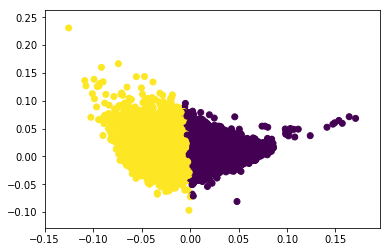

In [12]:
%timeit pass

# Normalize the data.
X_norm = normalize(df)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_pred)
plt.show()

## Four clusters

27.7 ns ± 4.52 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


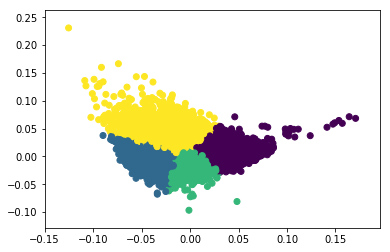

In [13]:
%timeit pass
# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_pred)
plt.show()

## Ten clusters

27.9 ns ± 5.51 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


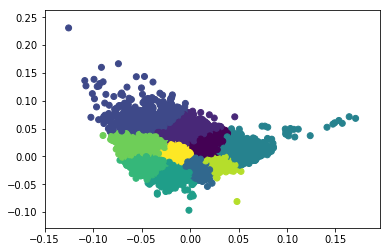

In [14]:
%timeit pass
# Calculate predicted values.
y_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_pred)
plt.show()

# Mean shift

In [15]:
from sklearn.model_selection import train_test_split
#Divide into training and test sets.
X_train, X_test = train_test_split(
    X_pca,
    test_size=0.7,
    random_state=42)

In [16]:
from sklearn.cluster import MeanShift, estimate_bandwidth

%timeit pass

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

28.1 ns ± 4.42 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Number of estimated clusters: 4


Four clusters estimated!

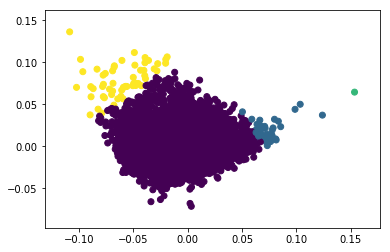

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

According to mean shift, looks like there is one big cluster, two small ones, and then one cluster with only one datapoint.

# Spectral clustering
## Four clusters

27.3 ns ± 2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


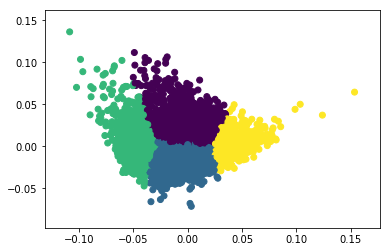

In [18]:
%timeit pass
from sklearn.cluster import SpectralClustering

# We know we're looking for four clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()


# Affinity Propagation
This one won't run...

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

%timeit pass

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

# Similarity: silhouette coefficient

We don't have a ground truth, so we are going to use a sulhouette coeffienct to assess reliability of results.

In [19]:
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    df,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

## Checking k-means for 4 clusters

In [20]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=4, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.466571672258
0.464207285263
0.461896110374
0.461416077984


We can see that k means reliably produces clusters of datapoints that are closer to other datapoints in the cluster than they are to datapoints in the other clusters.  There is also consistency across the four samples.

## Checking mean shift

In [21]:
for sample in [X1, X2, X3, X4]:
    bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=len(sample)-1)
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.366552530752
0.412726355891
0.384523310765
0.389301897636


Mean shift also reliably produces clusters of datapoints that are closer to other datapoints in the cluster than they are to datapoints in the other clusters.  There is not as much consistency across the four samples as k means.

## Spectral clustering

In [23]:
for sample in [X_pca1, X_pca2, X_pca3, X_pca4]:
    model = SpectralClustering(n_clusters=4).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.31386623074
0.312555101622
0.318664397829
0.3089099483


Used pca samples here to cut down on run time.  Pretty consistent coefficients across four samples with good results!


It looks like, with 4 clusters, k means did the best.